## 基本步驟

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
print "Test set score: {:.2f}".format(logreg.score(X_test, y_test))

Test set score: 0.88


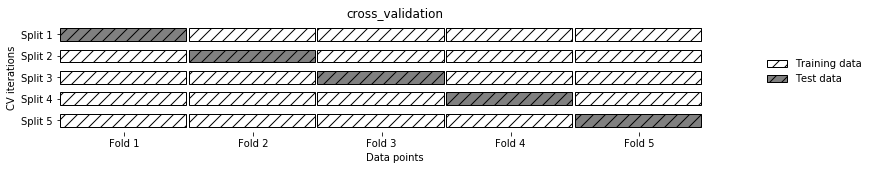

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

## 交叉驗證

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print "Cross-validation scores:{}".format(scores)

Cross-validation scores:[ 1.          0.96666667  0.93333333  0.9         1.        ]


In [5]:
print "Average cross-validation scores:{}".format(scores.mean())

Average cross-validation scores:0.96


In [6]:
# 使用 K-Fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print "Cross-validation scores:{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores:[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
print "Cross-validation scores:{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores:[ 0.96666667  0.9         0.96666667  0.96666667  0.93333333]


In [8]:
# Leave-one-out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print "Number of cv iterations:", len(scores)
print "Mean accuracy:{:.2f}".format(scores.mean())

Number of cv iterations: 150
Mean accuracy:0.95


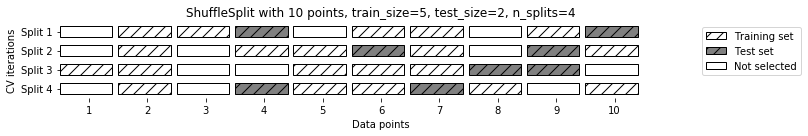

In [9]:
mglearn.plots.plot_shuffle_split()

In [10]:
# Shuffle-split
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print "scores:\n{}".format(scores)

scores:
[ 0.94666667  0.81333333  0.92        0.93333333  0.86666667  0.96        0.96
  0.97333333  0.94666667  0.90666667]


In [11]:
# 均格搜尋（Grid Search）
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print "Size of training set:{} \n size of test set: {}".format(X_train.shape[0], X_test.shape[0])

Size of training set:112 
 size of test set: 38


In [12]:
best_score = 0
###